# **PROJECT TITLE : BANK MARKETING DATASET**

PROBLEM STATEMENT : The goal of this project is to analyze the Bank Marketing Dataset to understand customer behavior and improve the targeting and effectiveness of marketing campaigns. The dataset contains information about customers who were contacted by a bank for a marketing campaign aimed at offering term deposits. The problem at hand involves exploring the relationships between various customer attributes and the likelihood of a customer subscribing to a term deposit.

DATASET : BANK MARKETING DATASET

**STEP 1**

1.Handle and manipulate data (pandas, numpy),

2.Visualize data (matplotlib, seaborn),

3.Preprocess data (LabelEncoder, StandardScaler),

4.Build and train a machine learning model (LogisticRegression),

5.Evaluate the model's performance (accuracy_score, confusion_matrix, classification_report).

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




**STEP 2**

**pd**.read_csv() is a function from the pandas library that reads a CSV (Comma Separated Values) file and loads it into a DataFrame.

In [ ]:
# Load the dataset (assumed to be a CSV file)
df = pd.read_csv('/content/bank 1.csv')
# Display the first few rows of the dataset
print(df.head())





   age         job  marital  education  balance housing loan  contact  day  \
0   59      admin.  married  secondary     2343     yes   no  unknown    5   
1   56      admin.  married  secondary       45      no   no  unknown    5   
2   41  technician  married  secondary     1270     yes   no  unknown    5   
3   55    services  married  secondary     2476     yes   no  unknown    5   
4   54      admin.  married   tertiary      184      no   no  unknown    5   

  month  duration  campaign  outcome deposit  
0   may      1042         1  unknown     yes  
1   may      1467         1  unknown     yes  
2   may      1389         1  unknown     yes  
3   may       579         1  unknown     yes  
4   may       673         2  unknown     yes  


In [ ]:
df.shape

(11162, 14)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  outcome    11162 non-null  object
 13  deposit    11162 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.2+ MB
None


In [ ]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
outcome      object
deposit      object
dtype: object


In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'outcome',
       'deposit'],
      dtype='object')




df['contact'] is used to access the column named 'contact' in the pandas DataFrame df.

In [ ]:
#accessing single column in df
print(df['contact'])

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
11157    cellular
11158     unknown
11159    cellular
11160    cellular
11161    cellular
Name: contact, Length: 11162, dtype: object




df[['education', 'job']] is used to access multiple columns in the pandas DataFrame df.

In [ ]:
#accessing multiple column in df
print(df[['education','job']])

       education          job
0      secondary       admin.
1      secondary       admin.
2      secondary   technician
3      secondary     services
4       tertiary       admin.
...          ...          ...
11157    primary  blue-collar
11158  secondary     services
11159  secondary   technician
11160  secondary   technician
11161  secondary   technician

[11162 rows x 2 columns]




df.iloc[0] is used to access the first row in the DataFrame df based on its integer position (index).iloc stands for integer-location based indexing, which allows you to select rows and columns by their numerical index (position) rather than by labels.

In [ ]:
#accessing row by integer index
print(df.iloc[0])

age                 59
job             admin.
marital        married
education    secondary
balance           2343
housing            yes
loan                no
contact        unknown
day                  5
month              may
duration          1042
campaign             1
outcome        unknown
deposit            yes
Name: 0, dtype: object




print(df.iloc[:,0]) prints the content of the first column. This will display a pandas Series that contains the values of the first column along with the corresponding index (row labels).

In [ ]:
#accessing column by integer index
print(df.iloc[:,0])

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64


STEP 3: DATA CLEANING AND PREPROCESSING

print(df.isnull().sum()) prints out the number of missing values (NaN) for each column in the DataFrame df.

In [ ]:
# Data Preprocessing
# Check for missing values
print(df.isnull().sum())



age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
outcome      0
deposit      0
dtype: int64




df['balance'] accesses the balance column from the DataFrame df..fillna() is a pandas method used to fill missing values (NaN) in a Series or DataFrame.inplace=True means that the changes will be applied directly to the original DataFrame df, modifying the balance column in place.

In [ ]:
# Handle missing values (example: filling missing numerical columns with mean)
df['balance'].fillna(df['balance'].mean(), inplace=True)



<ipython-input-12-9f345412e0ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balance'].fillna(df['balance'].mean(), inplace=True)


STEP 4: CONVERT CATEGORICAL VARAIABLES AND NUMERICAL VALUES

label_cols is a list of column names in the DataFrame df that contain categorical data. These columns represent categorical variables, such as 'job', 'marital', 'education', etc.

In [ ]:

# Convert categorical variables to numerical using Label Encoding
label_cols = ['job', 'marital', 'education', 'contact', 'month', 'outcome', 'housing', 'loan', 'deposit']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])



**STEP 5 : EXPLORATORY DATA ANALYSIS (EDA)**

1.**HISTOGRAM**

1.plt.figure(figsize=(10, 6)):
This line is setting the size of the figure for the plot. It creates a figure of 10 inches wide and 6 inches tall, which helps in making the plot more readable and aesthetically pleasing.

2.sns.histplot(df['age'], bins=20, kde=True):

ns.histplot() is a function from the Seaborn library that creates a histogram (a graphical representation of the distribution of numerical data).

3.plt.title('Distribution of Age'):

This sets the title of the plot to "Distribution of Age".

4.plt.xlabel('Age'):

This labels the x-axis of the plot as "Age", which represents the variable being plotted.

5.plt.ylabel('Frequency'):

This labels the y-axis of the plot as "Frequency", which indicates how often each value or range of values occurs in the dataset.


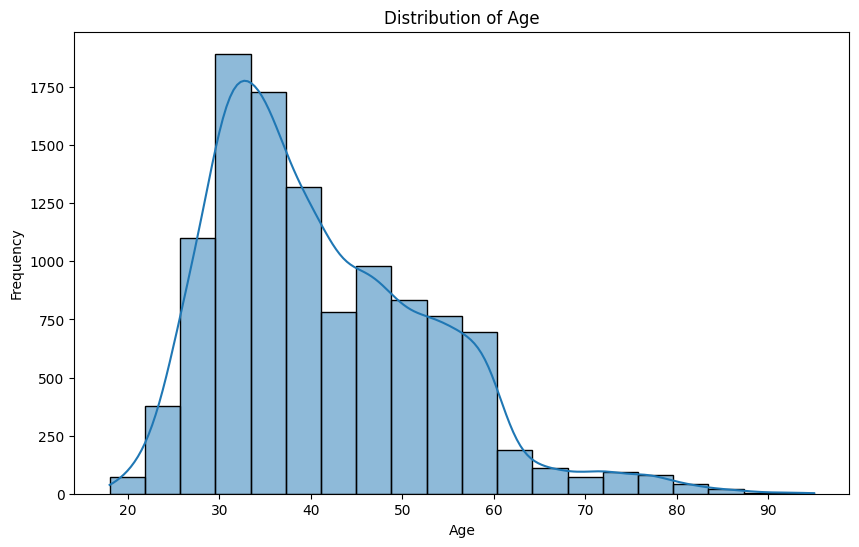

In [ ]:
# EDA: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**2.COUNTPLOT**

sns.countplot() is a function from the Seaborn library that creates a count plot, which is a bar plot showing the frequency of different categories in a categorical variable.

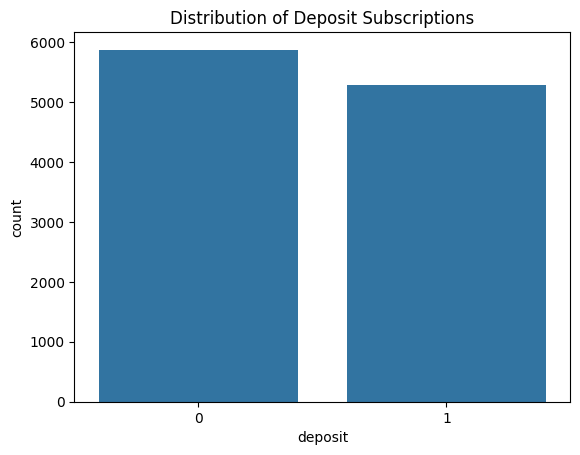

In [ ]:
# EDA: Distribution of Deposit (Target Variable)
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Deposit Subscriptions')
plt.show()


**COUNTPLOT**

ns.countplot(x='job', hue='deposit', data=df):

sns.countplot(): This function from Seaborn creates a count plot, which displays the frequency of observations in each category.

x='job': The x axis will represent the different job types, which are likely categorical values (e.g., "admin", "technician", "blue-collar", etc.).

hue='deposit': This argument adds color differentiation based on the deposit column, which represents the target variable

data=df: This specifies that the data for the plot is coming from the DataFrame df.

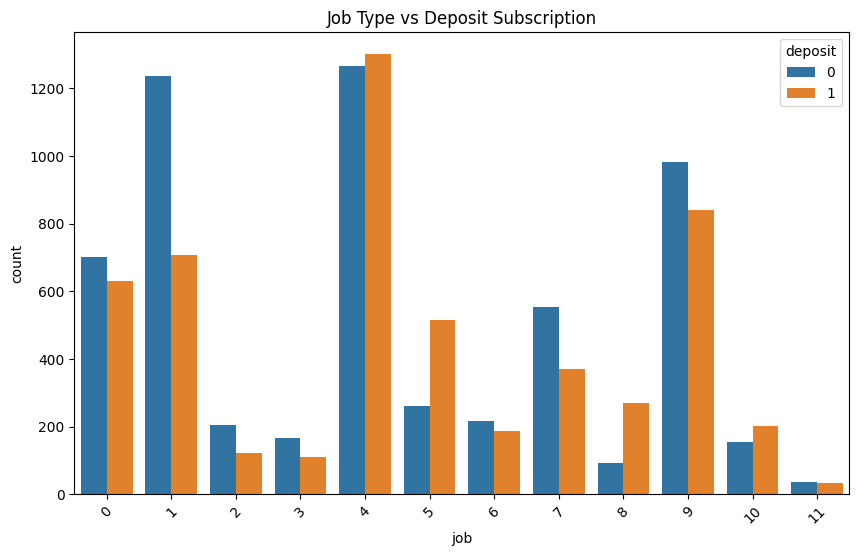

In [ ]:
# EDA: Job vs Deposit
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='deposit', data=df)
plt.title('Job Type vs Deposit Subscription')
plt.xticks(rotation=45)
plt.show()

3.BOXPLOT:

This code creates a box plot to visualize the distribution of balance for each job type in the dataset df:

sns.boxplot(x='job', y='balance', data=df): Plots a box plot with job on the x-axis and balance on the y-axis.

plt.figure(figsize=(8, 6)): Sets the plot size.

plt.title('Job Type vs Balance'): Adds a title to the plot.

plt.xticks(rotation=45): Rotates x-axis labels (job types) by 45 degrees for better readability.

plt.show(): Displays the plot.

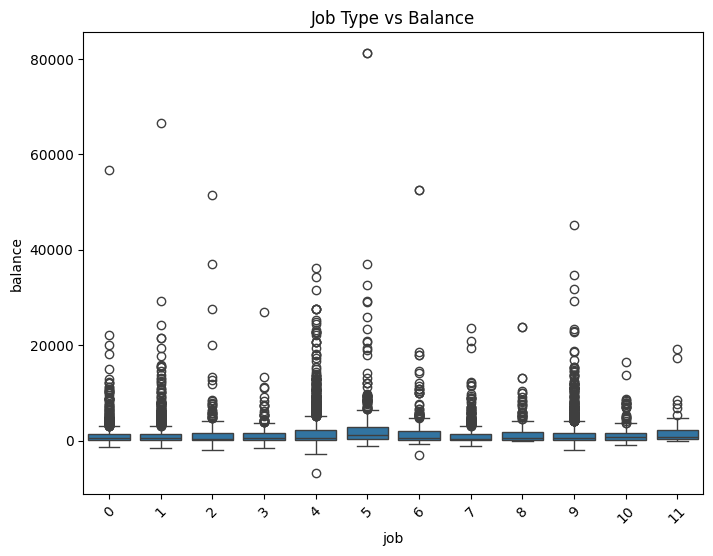

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='job', y='balance', data=df)
plt.title('Job Type vs Balance')
plt.xticks(rotation=45)
plt.show()



4. HISTOGRAM

This code compares the distribution of actual vs predicted values using histograms:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}): Creates a DataFrame with actual and predicted values.

sns.histplot(): Plots histograms for actual (blue) and predicted (red) values.

bins=20: Divides the data into 20 bins.

alpha=0.6: Sets transparency for better overlap visibility.

plt.title('Distribution of Actual vs Predicted Values'): Adds a title.

plt.legend(): Displays the legend to differentiate the actual and predicted histograms.

plt.show(): Displays the plot.

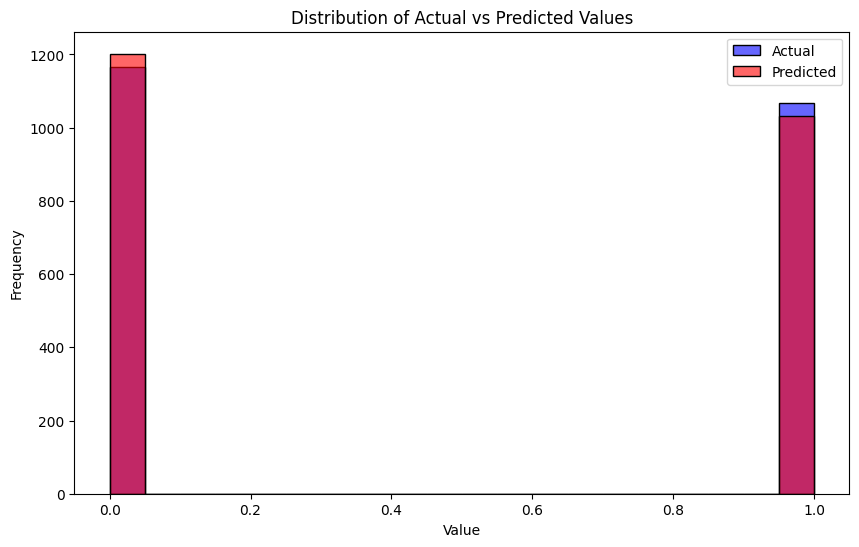

In [ ]:


# Now we can plot the distribution of Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))

sns.histplot(df['Actual'], kde=False, color='blue', label='Actual', bins=20, alpha=0.6)
sns.histplot(df['Predicted'], kde=False, color='red', label='Predicted', bins=20, alpha=0.6)

plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


5.LINEPLOT

This code creates a line plot to visualize the distribution of deposit subscriptions:

deposit_counts = original_df['deposit'].value_counts(): Counts occurrences of "Yes" and "No" in the deposit column.

sns.lineplot(): Plots the counts on the x-axis (deposit status) and y-axis (count) with blue lines and circular markers.

plt.title(), plt.xlabel(), and plt.ylabel(): Add title and axis labels.

plt.show(): Displays the plot.

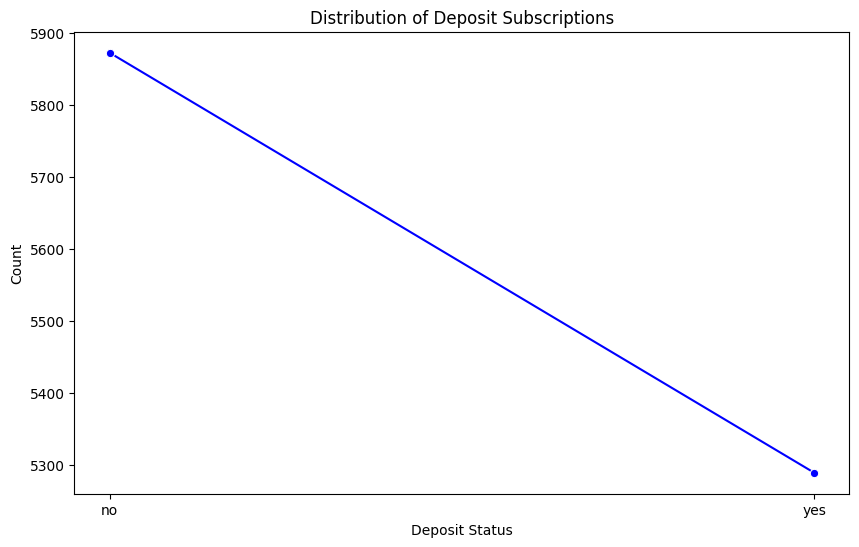

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

original_df = pd.read_csv('/content/bank 1.csv')
deposit_counts = original_df['deposit'].value_counts()
plt.figure(figsize=(10, 6))
sns.lineplot(x=deposit_counts.index, y=deposit_counts.values, marker='o', color='b')
plt.title('Distribution of Deposit Subscriptions')
plt.xlabel('Deposit Status')
plt.ylabel('Count')
plt.show()

**BARPLOT**

The code creates a bar plot showing the distribution of deposit subscriptions in the original_df dataset. Here's a breakdown:

Count deposit statuses:

deposit_counts = original_df['deposit'].value_counts().reset_index() counts the occurrences of each deposit status (yes, no) and converts the result into a DataFrame.

Rename columns:

deposit_counts.columns = ['Deposit Status', 'Count'] renames the columns for clarity.

Create bar plot:

sns.barplot(x='Deposit Status', y='Count', data=deposit_counts, palette='Blues') creates a bar plot showing the count of each deposit status.
Set plot labels and title:

plt.title('Distribution of Deposit Subscriptions'), plt.xlabel('Deposit Status'), and plt.ylabel('Count') label the plot.
Show plot:

plt.show() displays the plot.

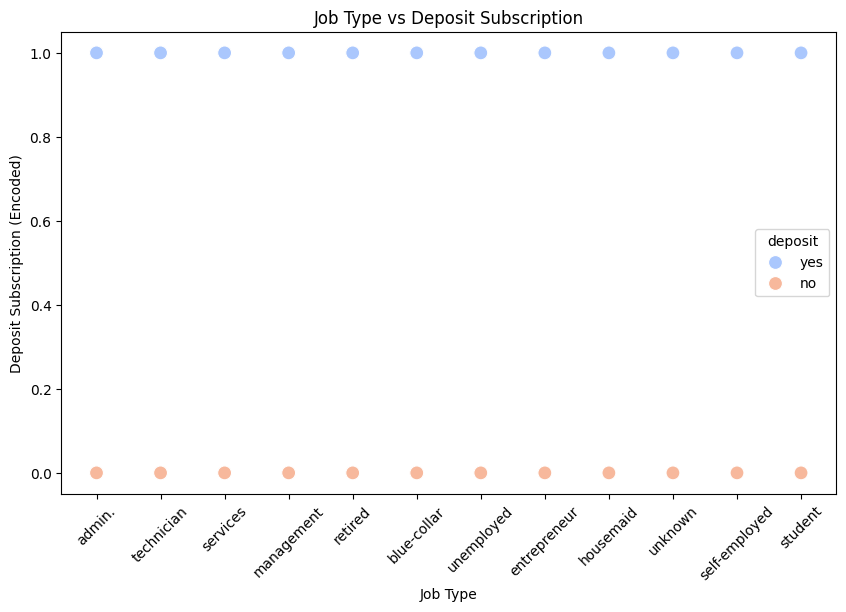

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

original_df['deposit_encoded'] = original_df['deposit'].map({'no': 0, 'yes': 1})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='job', y='deposit_encoded', data=original_df, hue='deposit', palette='coolwarm', s=100)
plt.title('Job Type vs Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Deposit Subscription (Encoded)')
plt.xticks(rotation=45)
plt.show()

**SCATTER PLOT**

Scatter plot:
X-axis: Job types.
Y-axis: Encoded deposit subscription (0 or 1).

Points are colored based on the original deposit status using the coolwarm palette.

Formatting: Adds a title, axis labels, and rotates x-axis labels for better readability.

<ipython-input-34-f81911e826e6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deposit Status', y='Count', data=deposit_counts, palette='Blues')


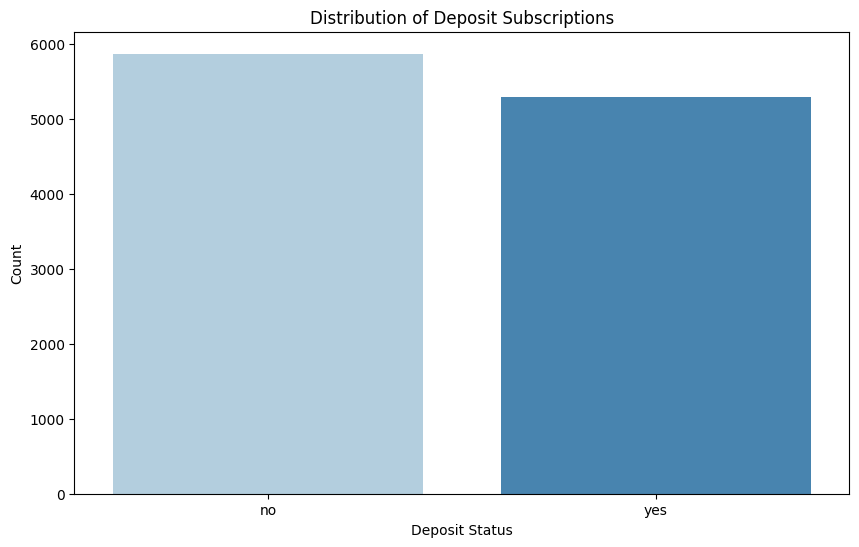

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

deposit_counts = original_df['deposit'].value_counts().reset_index()
deposit_counts.columns = ['Deposit Status', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Deposit Status', y='Count', data=deposit_counts, palette='Blues')
plt.title('Distribution of Deposit Subscriptions')
plt.xlabel('Deposit Status')
plt.ylabel('Count')
plt.show()

**PAIRPLOT**

Plots job_encoded vs. deposit_encoded with points colored by deposit status (hue='deposit_encoded').

Uses the coolwarm color palette.

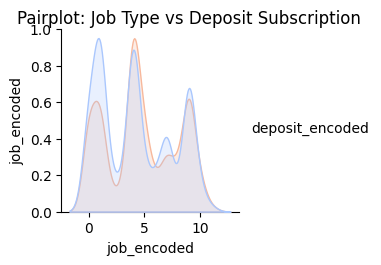

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

original_df['job_encoded'] = original_df['job'].astype('category').cat.codes
original_df['deposit_encoded'] = original_df['deposit'].map({'no': 0, 'yes': 1})
sns.pairplot(original_df[['job_encoded', 'deposit_encoded']], hue='deposit_encoded', palette='coolwarm')
plt.suptitle('Pairplot: Job Type vs Deposit Subscription', y=1.02)
plt.show()

**LINEPLOT** AND ECDF

The code creates an ECDF plot to show the cumulative count of deposit subscriptions by job type:

1.Group and count: Groups the data by job and counts deposit subscriptions (yes/no).

2.Cumulative sum: Calculates the cumulative count of deposits for each job type.

3.Plot: Plots the cumulative distribution using a line plot, with markers for each data point.

4.Formatting: Adds title, axis labels, and rotates x-axis labels for better readability.

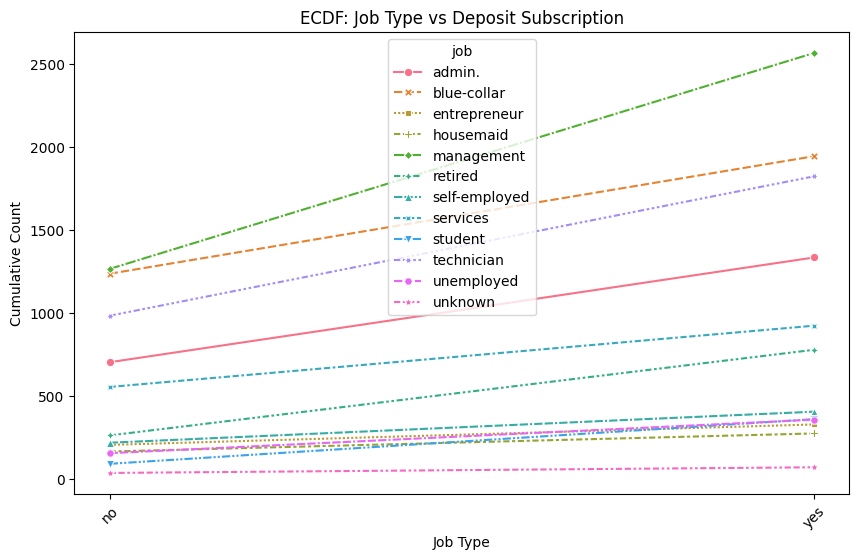

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

job_deposit_counts = original_df.groupby('job')['deposit'].value_counts().unstack(fill_value=0)
job_deposit_cdf = job_deposit_counts.cumsum(axis=1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=job_deposit_cdf.T, markers=True)
plt.title('ECDF: Job Type vs Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=45)
plt.show()

**STEP 6: CORRELATION ANALYSIS**

** HEATMAP**

sns.boxplot(): This creates a box plot, which is used to visualize the distribution of a numerical variable (y) across different categories of a categorical variable (x).
x='job':

y='balance': This specifies that the numerical variable being plotted on the y-axis is balance. For each job type, the distribution of balance values will be displayed.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


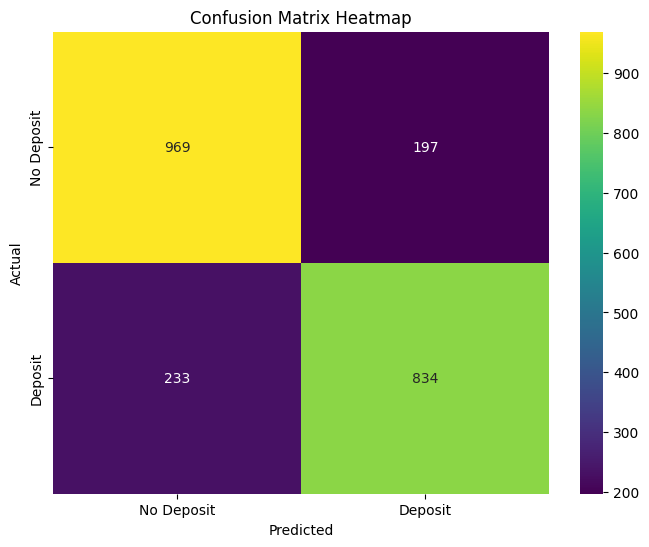

In [ ]:

# Separate target ('deposit') from features
y = df['deposit']  # Target column (deposit)
X = df.drop(columns=['deposit'])  # Feature columns

# Handle categorical columns (one-hot encoding for 'job', 'marital', etc.)
X = pd.get_dummies(X, drop_first=True)  # This will convert categorical columns to dummy/indicator variables

# Encode target variable if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a model (Logistic Regression as an example)
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predicted labels to the original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Convert y_test to the same string format as y_pred_labels
y_test_labels = label_encoder.inverse_transform(y_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Deposit', 'Deposit'], columns=['No Deposit', 'Deposit'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**INSIGHTS : **

1. Understanding Customer Behavior
Customer Attributes:

 The dataset likely contains demographic details (e.g., age, job type, marital status), economic conditions
(e.g., balance, housing), and previous contact details
(e.g., contact communication type, previous outcome).

2. Predicting Subscription Likelihood
Modeling Customer Response:

 The key question is to predict whether a customer will subscribe to a term deposit (yes or no).
By training a machine learning model
 (e.g., logistic regression, decision trees), you can create a predictive model based on historical data. This model helps assess the likelihood of a customer subscribing to a deposit, based on their attributes.

 3.Campaign Improvement and Optimization
Improved Targeting:

 By identifying which attributes are the best predictors of subscription, the bank can tailor its marketing efforts. For example, if age and job are strong indicators, the bank could focus its campaigns more on specific age groups or professions that are more likely to subscribe.

 4. Exploring Relationships Between Customer Attributes and Subscription Data Visualization:

 Visualization techniques (e.g., heatmaps, pairplots, ECDFs) allow you to observe relationships between variables and the target. For example, a pairplot might show that customers with high balance and stable job are more likely to subscribe, while a heatmap can reveal strong correlations between attributes like housing loan status and deposit subscription.

 5. Predictive Model Evaluation Model Performance:

 Using metrics like accuracy, confusion matrix, and classification report, you can assess the model’s ability to correctly predict whether a customer will subscribe. These metrics help identify areas where the model may need improvement (e.g., reducing false positives or negatives).

**CONCLUSION : **

The analysis of the Bank Marketing Dataset has provided valuable insights into customer behavior, specifically regarding their likelihood to subscribe to a term deposit. By exploring various customer attributes such as job type, age, marital status, education level, and contact-related variables, we have been able to identify key factors that influence a customer's decision to subscribe to a deposit.